In [2]:
#%cd C:\\Users\\UXJX\\Desktop

In [3]:
pwd

'/Users/axjx/Downloads'

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from __future__ import division
import sys 
import seaborn as sns
import datetime
import dateutil.parser

In [5]:
index_change_data= pd.read_excel('IndexChangeData.xlsx')

In [6]:
CBOE = pd.read_excel('IndexChangeData.xlsx', sheetname = 0)
REG = pd.read_excel('IndexChangeData.xlsx', sheetname = 1)
SNPS = pd.read_excel('IndexChangeData.xlsx', sheetname = 2)
IT = pd.read_excel('IndexChangeData.xlsx', sheetname = 3)
CARS = pd.read_excel('IndexChangeData.xlsx', sheetname = 4)

In [7]:
#Data Viz Tool:
#filter on Name (e.g. CBOE, REG, etc.)
#filter on Date range based on days before, announce date, effective date, days after
#filter on Price
#filter on Shares (x100?)
#filter on Price x Shares

In [8]:
#Individual datasets vs. One to filter based on Name 

In [9]:
CBOE.head(2)

,CBOE US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2017-02-23 09:30:00,BEST_BID,76.51,6,F
1,2017-02-23 09:30:00,BEST_BID,76.52,1,K


In [10]:
REG.head(2)

,REG US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,#N/A Requesting Data...,BEST_ASK,70.9,2,Z
1,2017-02-24 09:04:00,BEST_ASK,70.9,1,X


In [11]:
SNPS.head(2)

,SNPS US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2017-03-13 09:02:15,BEST_ASK,72.77,1,K
1,2017-03-13 09:05:44,BEST_ASK,74.87,2,K


In [12]:
IT.head(2)

,IT US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2017-03-31 09:20:00,BEST_ASK,160.38,1,T
1,2017-03-31 09:20:40,BEST_BID,108.27,1,P


In [13]:
CARS.head(2)

,CARS US Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2017-05-31 09:29:38,BEST_BID,21.62,2,J
1,2017-05-31 09:29:38,BEST_ASK,30.55,2,J


In [14]:
#Excel Sheets: CBOE, REG, SNPS, IT, CARS
#dates: AdhocDanaKenny 

#CBOE
#REG ... announce_date: 3/1 .. efftv_dt: 3/2/
    #...                2/27...efftv_dt: 3/2/
    
#SNPS ...announce_date: 3/14 ..efftv_dt: 3/16
#IT .....               3/31             4/5
#CARS ...               6/1              6/2


In [15]:
index_change_data.shape

(400105, 5)

In [16]:
index_change_data = index_change_data.rename(index=str, columns={"CBOE US Equity": "Date",
                                    "Unnamed: 1": "Trade",
                                      "Unnamed: 2": "Price",
                                      "Unnamed: 3": "Shares",
                                      "Unnamed: 4": "Exchange"})

In [17]:
icd_trades = index_change_data.loc[index_change_data['Trade'] == 'TRADE']

In [18]:
icd_trades = icd_trades.reset_index()
icd_trades = icd_trades[['Date', 'Trade', 'Price', 'Shares']]

In [19]:
icd_trades.shape

(103546, 4)

In [20]:
index_CBOE = pd.read_excel('CBOE.xlsx')

In [21]:
# tckr_sym_cd	bloomberg_ticker
# CBOE	CBOE UW Equity

index_CBOE.head(3)
index_CBOE = index_CBOE.rename(index=str, columns={"CBOE US Equity": "Date",
                                    "Unnamed: 1": "Trade",
                                      "Unnamed: 2": "Price",
                                      "Unnamed: 3": "Shares",
                                      "Unnamed: 4": "Exchange"})

In [22]:
index_CBOE.dtypes

Date        datetime64[ns]
Trade               object
Price              float64
Shares               int64
Exchange            object
dtype: object

In [23]:
# import bqplot

In [24]:
# from bqplot import pyplot as plt
# import numpy as np

# plt.figure(1, title='Line Chart')
# np.random.seed(0)
# n = 200
# x = np.linspace(0.0, 10.0, n)
# y = np.cumsum(np.random.randn(n))
# plt.plot(x, y)
# plt.show()

In [25]:
# plt.show()#Widget Javascript not detected.  It may not be installed or enabled properly.

In [26]:
#time series
index_CBOE.head(10)

#parse dates? date interval for x-axis 

#Filter by Stock? Shiny?

,Date,Trade,Price,Shares,Exchange
0,2017-02-23 09:30:00,TRADE,80.570,2532,Q
1,2017-02-23 09:30:01,TRADE,80.570,100,Q
2,2017-02-23 09:30:07,TRADE,80.180,100,F
3,2017-02-23 09:30:53,TRADE,80.405,548,D
4,2017-02-23 09:32:35,TRADE,80.330,100,Z
5,2017-02-23 09:32:36,TRADE,80.400,100,J
6,2017-02-23 09:32:36,TRADE,80.490,100,D
7,2017-02-23 09:32:42,TRADE,80.490,100,Q
8,2017-02-23 09:32:42,TRADE,80.500,100,Q
9,2017-02-23 09:32:42,TRADE,80.500,100,Q


In [35]:
for i in index_CBOE.Date[1:30]:
    print(i, type(i))

2017-02-23 09:30:01 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:30:07 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:30:53 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:35 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:36 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:36 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:42 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:42 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:42 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:42 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:42 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:42 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:43 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:43 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:43 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:43 <class 'pandas._libs.tslib.Timestamp'>
2017-02-23 09:32:43 <class 'pandas._libs.tslib.Timestamp

In [27]:
df = index_CBOE[['Date', 'Price']]

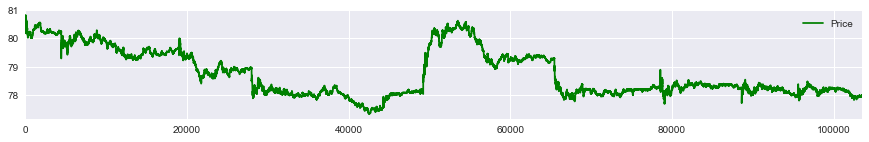

In [28]:
df.plot(color='g', figsize=(15,2)).set_title('')

In [29]:
df

,Date,Price
0,2017-02-23 09:30:00,80.570
1,2017-02-23 09:30:01,80.570
2,2017-02-23 09:30:07,80.180
3,2017-02-23 09:30:53,80.405
4,2017-02-23 09:32:35,80.330
5,2017-02-23 09:32:36,80.400
6,2017-02-23 09:32:36,80.490
7,2017-02-23 09:32:42,80.490
8,2017-02-23 09:32:42,80.500
9,2017-02-23 09:32:42,80.500


In [30]:
dff.describe()

NameError: name 'dff' is not defined

In [ ]:
dff = index_CBOE[['Date', 'Shares']]
dff.plot(color='g', figsize=(15,2)).set_title('')

#No scale? 

In [ ]:
index_CBOE.Date[-1] - index_CBOE.Date[0] #12 day period 

In [ ]:
#pivot table?? 

In [ ]:
#Graphs
#Price vs. Date
#Shares vs. Date

In [ ]:
index_CBOE.Date[0]

In [ ]:
index_CBOE.Date[1] - index_CBOE.Date[0]

In [ ]:
index_CBOE.Date.describe() #this is for a certain time interval of interest 

In [ ]:
index_CBOE.describe()

In [ ]:
index_CBOE.shape

In [ ]:
#metrics
#20min interval
#1 day before annouce_dt: 02/28/2017  ... Add has announce_dt of 02/24/2017
#3 days after efftv_dt: 03/01/2017
#process_dt?  02/28/2017

#share volume per day